# NBA Players Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

## Import dataset

In [2]:
dataset = pd.read_csv("all_seasons.csv")
dataset.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


## Check data size and data types

In [3]:
dataset.shape

(12844, 22)

In [4]:
dataset.columns
dataset.drop(dataset.columns[:1], axis=1, inplace=True)

In [5]:
dataset.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

## Check Missing data

In [6]:
dataset.isnull().sum()

player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

## Categorical and Numerical Data


In [7]:
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')


In [8]:
categorical_features = dataset.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['player_name', 'team_abbreviation', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'season'],
      dtype='object')


In [9]:
temporal_features = [col for col in dataset.columns if any(keyword in col.lower() for keyword in ['year', 'yr', 'date'])]
print(temporal_features)

['draft_year']


## Descriptive Statistics : Centrality and Dispersion

In [10]:
results = {}
for column in numerical_features:
    mean_value = dataset[column].mean()
    median_value = dataset[column].median()
    mode_value = dataset[column].mode()[0]
    std_dev_value = dataset[column].std()
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    results[column] = {
        'mean': mean_value,
        'median': median_value,
        'mode': mode_value,
        'std_dev': std_dev_value,
        'IQR': IQR
    }
for column, stats in results.items():
    print(f"\nStatistics for {column}:")
    print(f"Mean: {stats['mean']}")
    print(f"Median: {stats['median']}")
    print(f"Mode: {stats['mode']}")
    print(f"Standard Deviation: {stats['std_dev']}")
    print(f"IQR: {stats['IQR']}")


Statistics for age:
Mean: 27.045312986608533
Median: 26.0
Mode: 24.0
Standard Deviation: 4.339210682290991
IQR: 6.0

Statistics for player_height:
Mean: 200.555096543133
Median: 200.66
Mode: 205.74
Standard Deviation: 9.111090214547978
IQR: 15.240000000000009

Statistics for player_weight:
Mean: 100.26327920211773
Median: 99.79024
Mode: 99.79024
Standard Deviation: 12.426628079577663
IQR: 18.143680000000003

Statistics for gp:
Mean: 51.15415758330738
Median: 57.0
Mode: 82
Standard Deviation: 25.084904129109837
IQR: 42.0

Statistics for pts:
Mean: 8.212581750233571
Median: 6.7
Mode: 2.0
Standard Deviation: 6.01657348405825
IQR: 7.9

Statistics for reb:
Mean: 3.5584864528184363
Median: 3.0
Mode: 2.0
Standard Deviation: 2.4778845056198766
IQR: 2.9000000000000004

Statistics for ast:
Mean: 1.8246807848022422
Median: 1.2
Mode: 0.3
Standard Deviation: 1.8008397815911115
IQR: 1.7999999999999998

Statistics for net_rating:
Mean: -2.226339146683276
Median: -1.3
Mode: -0.3
Standard Deviation: 1

In [11]:
from scipy.stats import skew
skewness_results = {}
for column in numerical_features:
    skewness_value = dataset[column].skew()
    skewness_results[column] = skewness_value
for column, skewness_value in skewness_results.items():
    print(f"\nSkewness for {column}: {skewness_value}")
    if skewness_value > 0:
        print(f"The distribution of {column} is positively skewed (right-skewed).")
    elif skewness_value < 0:
        print(f"The distribution of {column} is negatively skewed (left-skewed).")
    else:
        print(f"The distribution of {column} is symmetric.")


Skewness for age: 0.5654951902243031
The distribution of age is positively skewed (right-skewed).

Skewness for player_height: -0.32319745540779
The distribution of player_height is negatively skewed (left-skewed).

Skewness for player_weight: 0.18945215881774177
The distribution of player_weight is positively skewed (right-skewed).

Skewness for gp: -0.53282128474378
The distribution of gp is negatively skewed (left-skewed).

Skewness for pts: 1.0843182501933872
The distribution of pts is positively skewed (right-skewed).

Skewness for reb: 1.2903934826884378
The distribution of reb is positively skewed (right-skewed).

Skewness for ast: 1.8612020601436194
The distribution of ast is positively skewed (right-skewed).

Skewness for net_rating: -0.7069123514463883
The distribution of net_rating is negatively skewed (left-skewed).

Skewness for oreb_pct: 2.3411005617647644
The distribution of oreb_pct is positively skewed (right-skewed).

Skewness for dreb_pct: 1.205773524604344
The dist

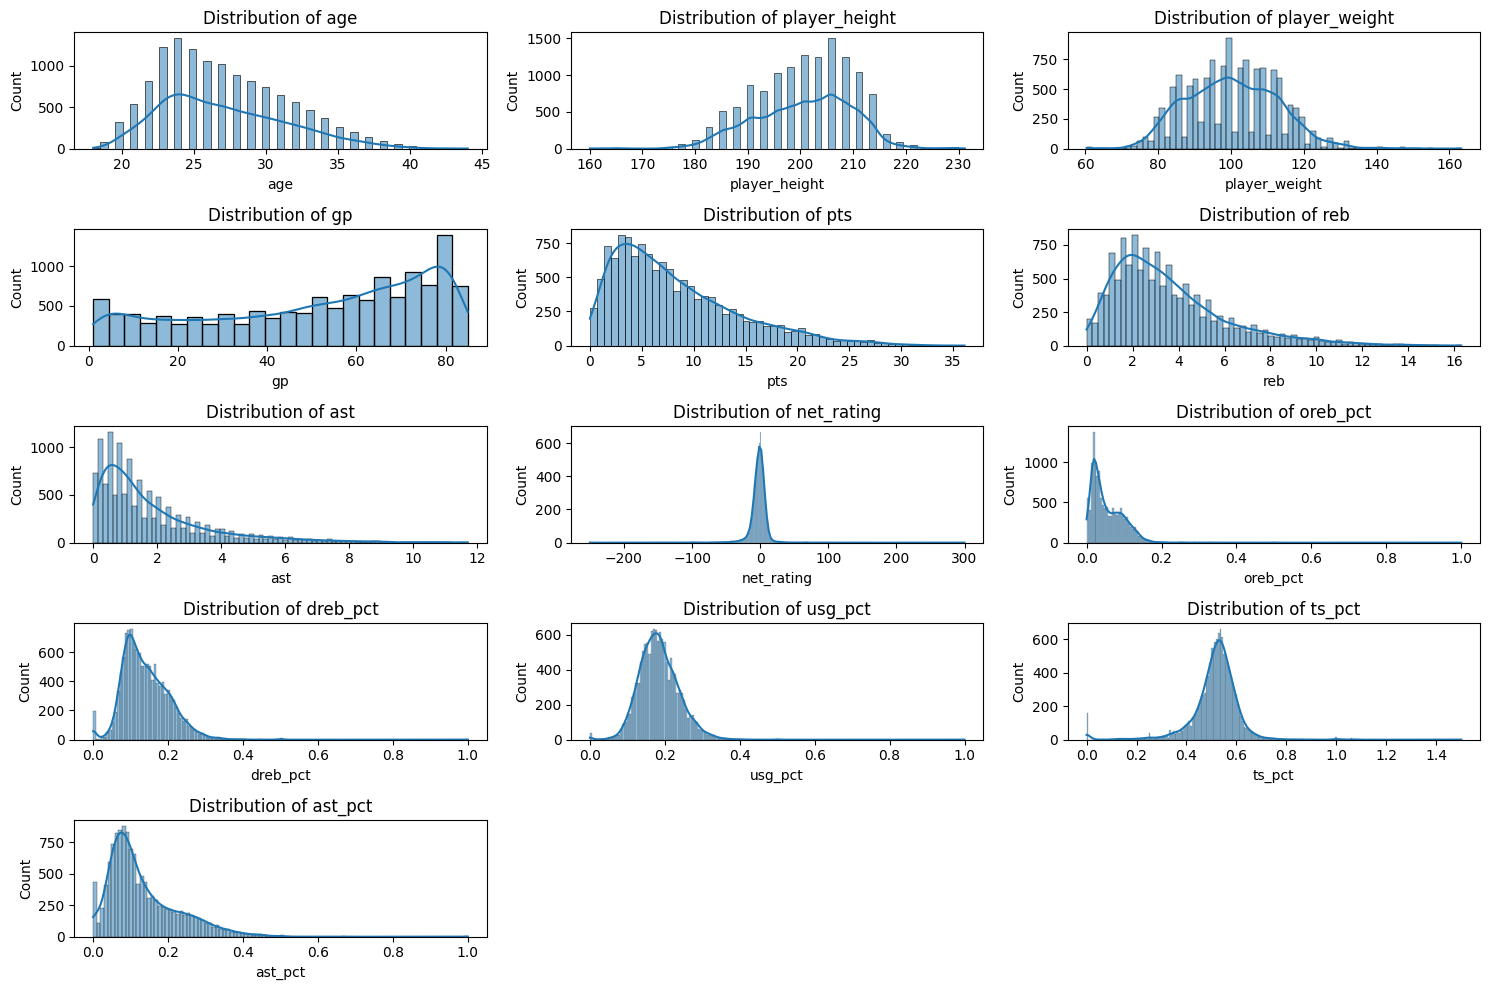

In [12]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.histplot(dataset[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### วิเคราะห์การกระจายตัวของข้อมูล
* จากการคำนวณค่าและพล็อตฮิสโตแกรมเพื่อสำรวจการกระจายตัวของข้อมูล พบว่า **มีการกระจายตัวแบบไม่สมมาตร**







<Axes: >

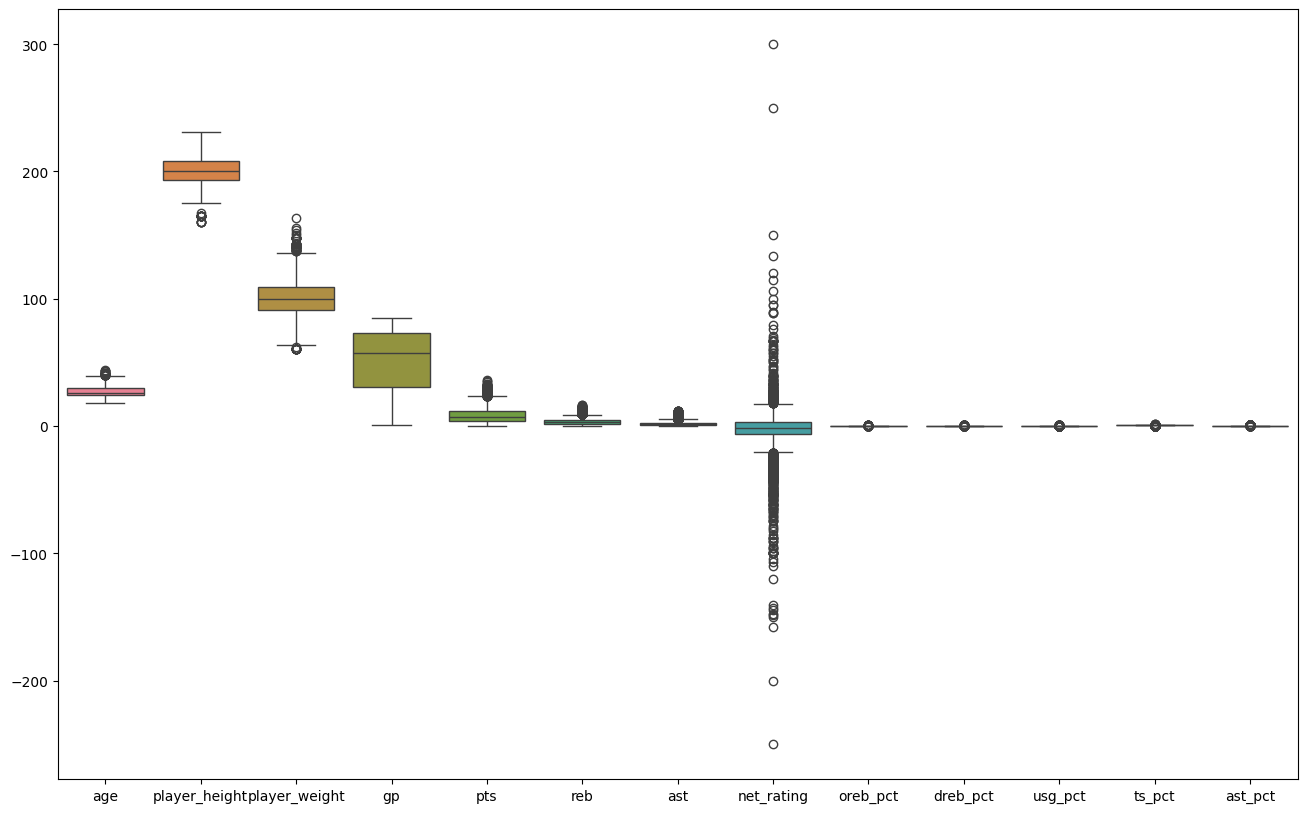

In [13]:
plt.figure(figsize=(16,10))
sns.boxplot(data = dataset)

<Axes: >

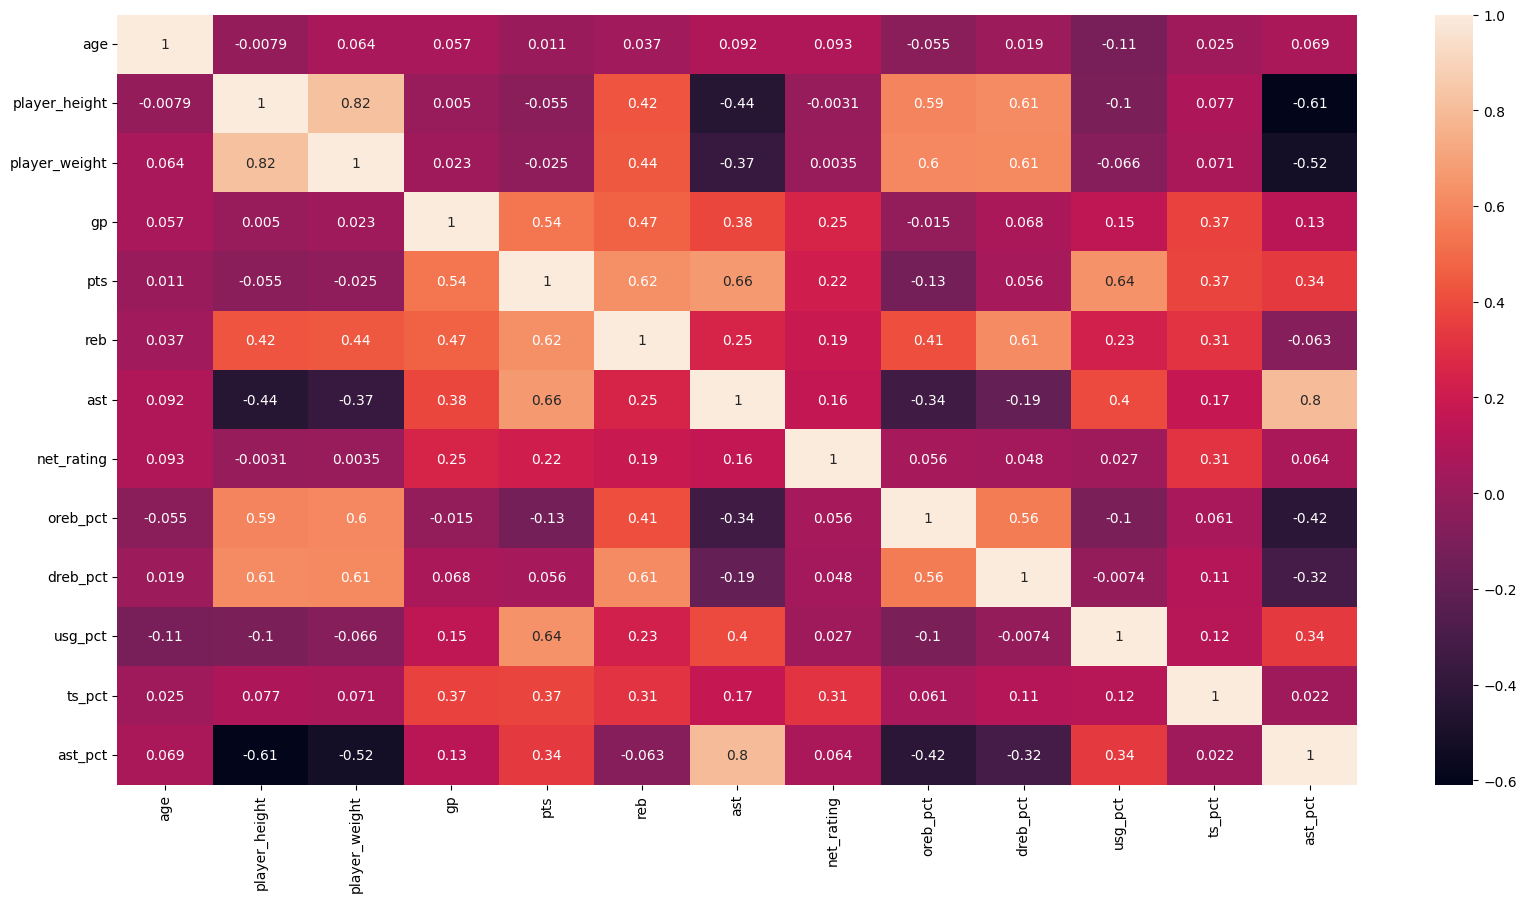

In [14]:
import seaborn as sn
df = dataset[numerical_features]

corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sn.heatmap(corr_matrix, annot=True)

จากการ Plot Correlation Matrix เพื่อดูความสัมพันธ์ของตัวแปรแต่ละตัว และทำการการเลือกตัวแปรเป้าหมาย (Dependent Variables) เป็น pts (Average number of points scored) และตัวแปรที่ใช้ในการทำนาย (Independent Variables) เป็น reb(Average number of rebounds grabbed), ast(Average number of assists distributed), usg_pct(Percentage of team plays used by the player while he was on the floor)

## Outlier Detection

### Box plot method

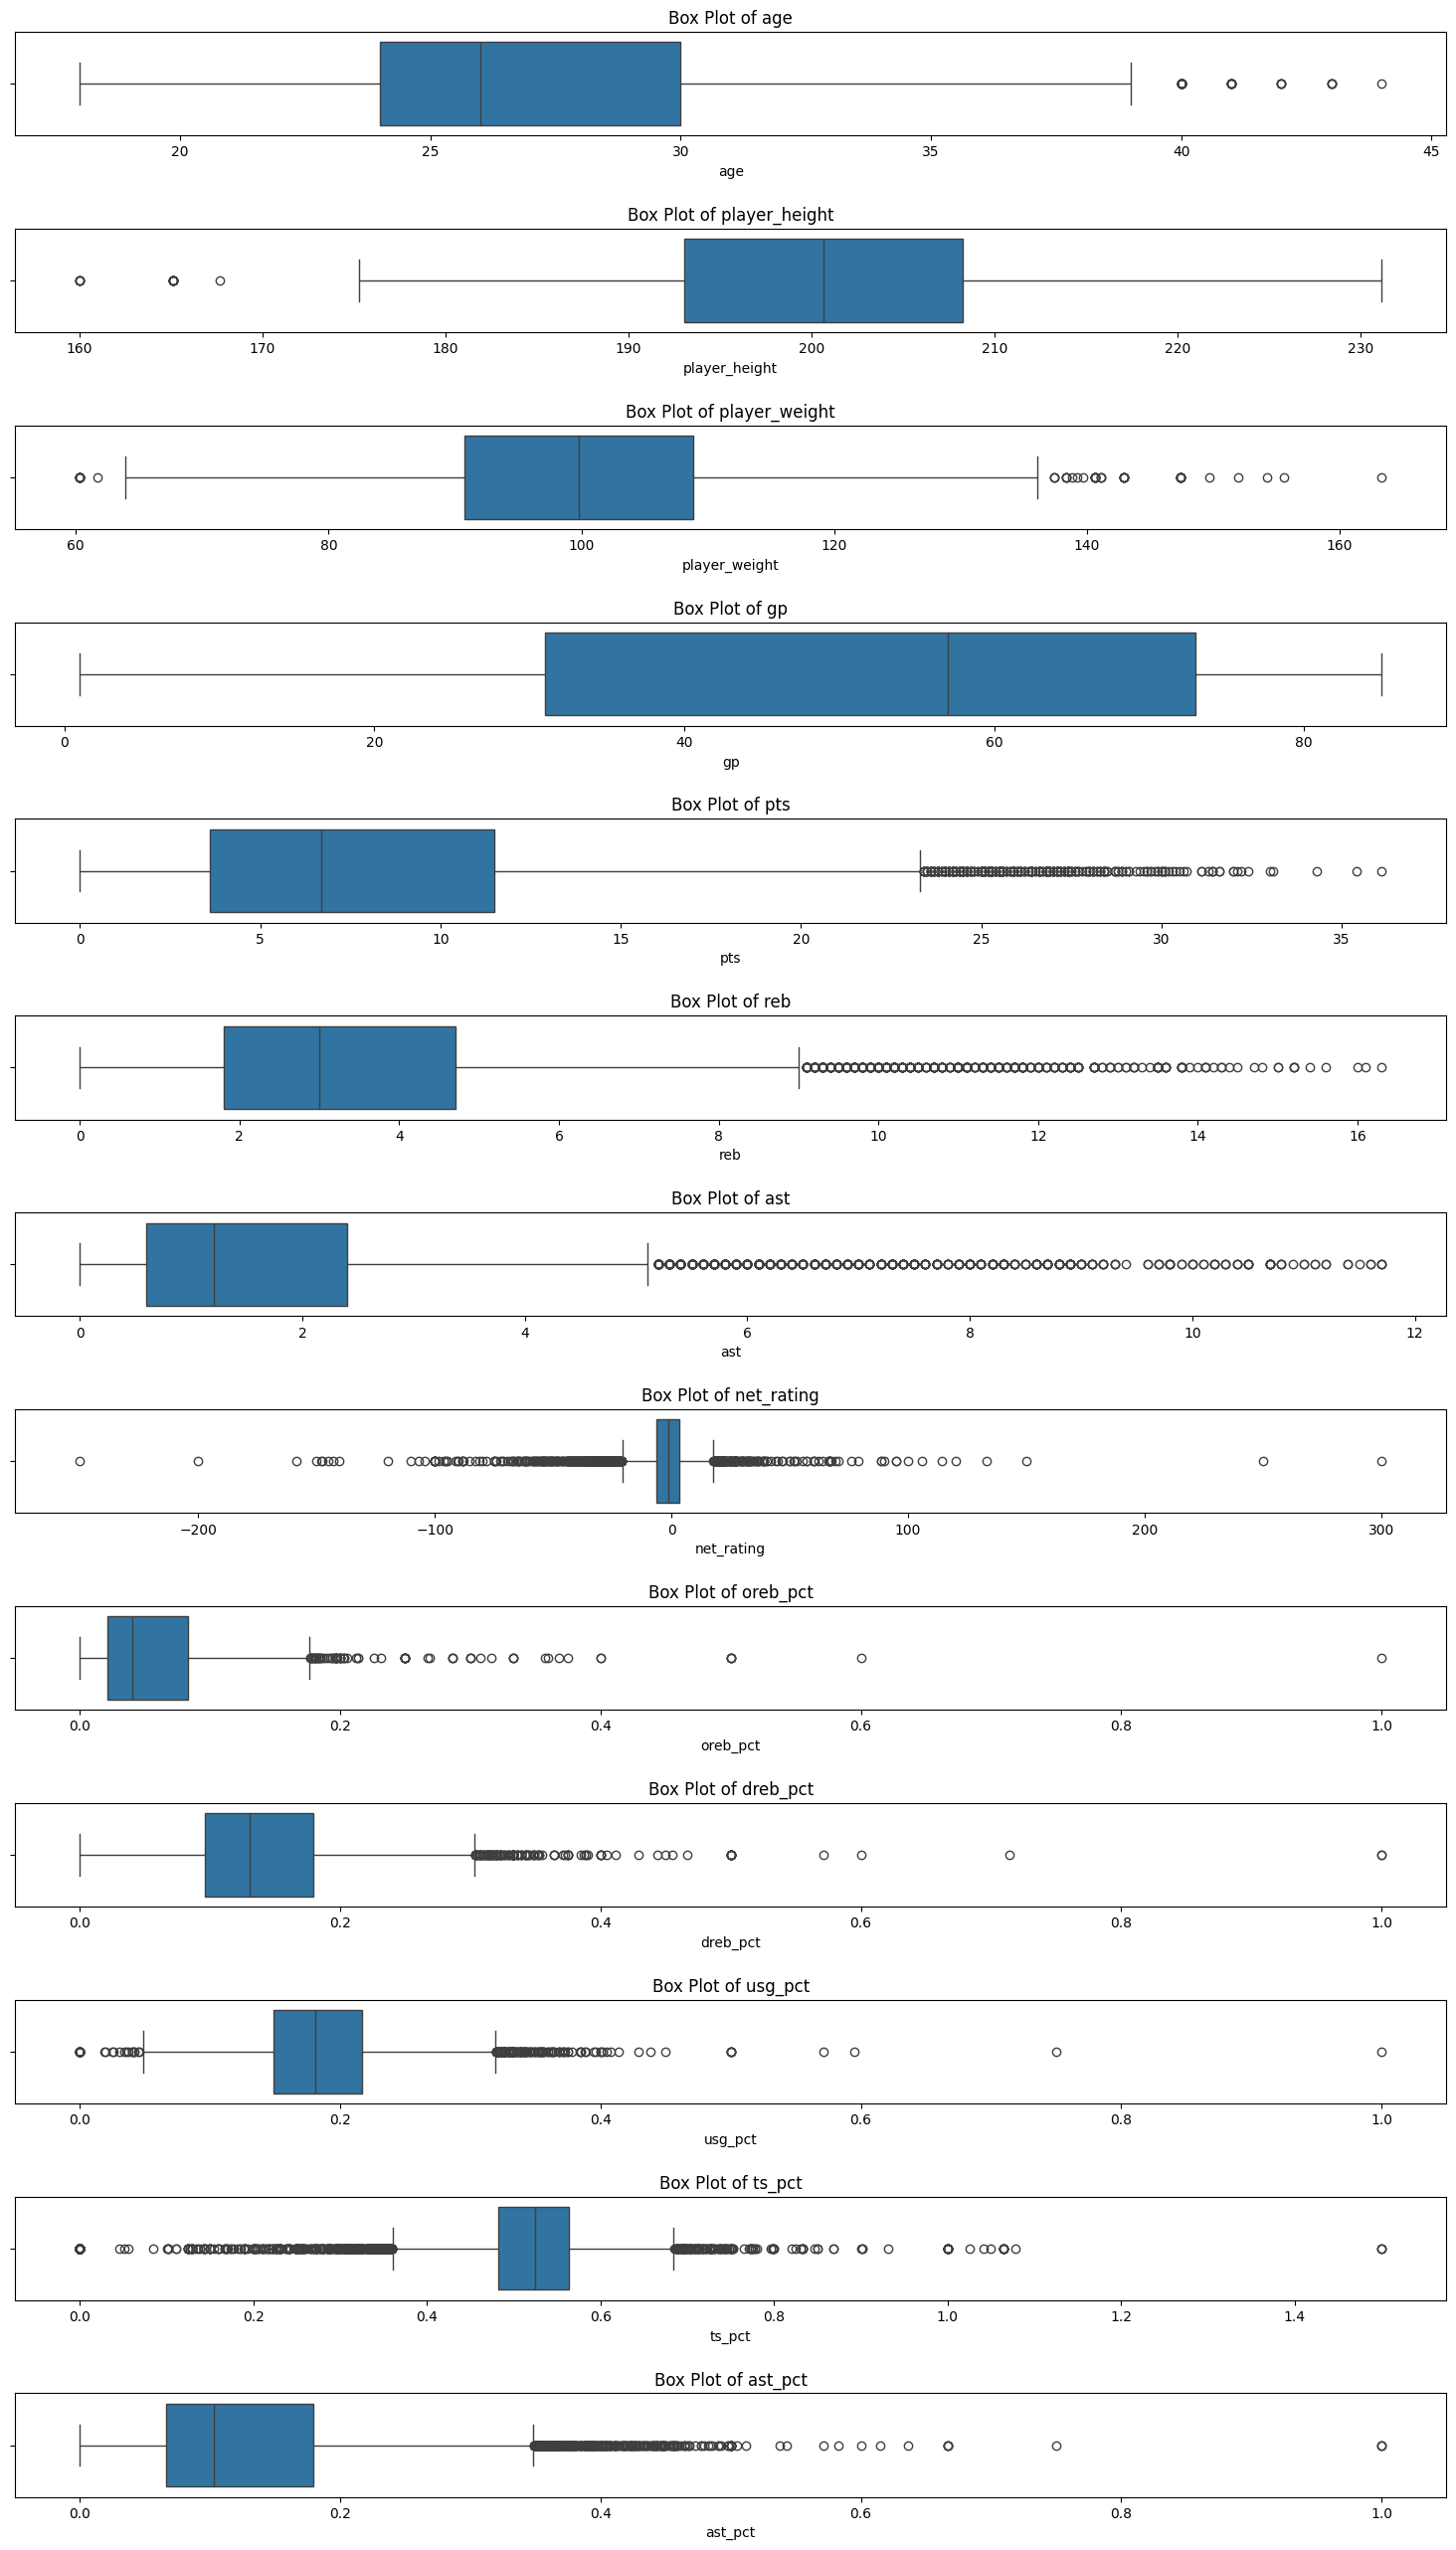

In [15]:
plt.figure(figsize=(15, 2*len(numerical_features)))

for i in range(len(numerical_features)):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.boxplot(x=dataset[numerical_features[i]])
    plt.title(f'Box Plot of {numerical_features[i]}')
    plt.xlabel(f'{numerical_features[i]}')
    plt.tight_layout(pad=2.0)

plt.show()

### วิเคราะห์ Outliers จาก Box plot


*   **พบ Outliers**
  * age
  * player_height
  * player_weight
  * pts
  * reb
  * ast
  * net_rating
  * oreb_pct
  * dreb_pct
  * usg_pct
  * ts_pct
  * ast_pct
*   **ไม่พบ Outliers**
  *  gp




### IQR method

In [16]:
import pandas as pd

outliers_iqr = {}

for feature in numerical_features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr_list = dataset[(dataset[feature] < lower_bound) | (dataset[feature] > upper_bound)][feature]
    outliers_iqr[feature] = outliers_iqr_list
    print(f'Outliers for {feature} using IQR:')
    print(len(outliers_iqr_list))

Outliers for age using IQR:
47
Outliers for player_height using IQR:
19
Outliers for player_weight using IQR:
57
Outliers for gp using IQR:
0
Outliers for pts using IQR:
298
Outliers for reb using IQR:
524
Outliers for ast using IQR:
841
Outliers for net_rating using IQR:
622
Outliers for oreb_pct using IQR:
76
Outliers for dreb_pct using IQR:
137
Outliers for usg_pct using IQR:
210
Outliers for ts_pct using IQR:
842
Outliers for ast_pct using IQR:
405


### Z-score method

In [17]:
from scipy import stats

outliers_z = {}

for feature in numerical_features:
    z_score = stats.zscore(dataset[feature])
    outliers_z_list = dataset[(z_score > 3) | (z_score < -3)][feature]
    outliers_z[feature] = outliers_z_list
    print(f'Outliers for {feature} using Z-score:')
    print(len(outliers_z_list))

Outliers for age using Z-score:
18
Outliers for player_height using Z-score:
39
Outliers for player_weight using Z-score:
54
Outliers for gp using Z-score:
0
Outliers for pts using Z-score:
145
Outliers for reb using Z-score:
197
Outliers for ast using Z-score:
268
Outliers for net_rating using Z-score:
195
Outliers for oreb_pct using Z-score:
61
Outliers for dreb_pct using Z-score:
83
Outliers for usg_pct using Z-score:
104
Outliers for ts_pct using Z-score:
285
Outliers for ast_pct using Z-score:
132


### Isolation forest method

In [18]:
from sklearn.ensemble import IsolationForest

dataset_copy = dataset.copy()
dataset_iso = dataset_copy[numerical_features]

for feature in numerical_features:
    feature_data = dataset_iso[[feature]]
    iforest = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
    iforest.fit(feature_data)
    prediction = iforest.fit_predict(feature_data)

    num_outliers = (prediction < 0).sum()
    print(f"Number of outliers for feature {feature}: {num_outliers}")

Number of outliers for feature age: 267
Number of outliers for feature player_height: 307
Number of outliers for feature player_weight: 360
Number of outliers for feature gp: 299
Number of outliers for feature pts: 292
Number of outliers for feature reb: 385
Number of outliers for feature ast: 371
Number of outliers for feature net_rating: 383
Number of outliers for feature oreb_pct: 377
Number of outliers for feature dreb_pct: 386
Number of outliers for feature usg_pct: 383
Number of outliers for feature ts_pct: 383
Number of outliers for feature ast_pct: 381


## Data Preprocessing


*   สำหรับวิธี IQR method และ Z-score method ทำ Data Proprocessing ด้วยวิธีการแทนค่า Outliers ด้วยค่ามัธยฐานหรือ Median
*   สำหรับวิธี Isolation forest method ทำ Data Proprocessing ด้วยวิธีการลบ Outliers

เพื่อนำไปเปรียบเทียบว่าเทคนิค Outliers Detection ไหนเหมาะสมกับ Dataset นี้โดยการนำไปทดสอบโมเดล

### IQR method

In [19]:
dataset_iqr = dataset.copy()
for feature in numerical_features:
    Q1 = dataset_iqr[feature].quantile(0.25)
    Q3 = dataset_iqr[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = dataset_iqr[feature].median()
    dataset_iqr.loc[(dataset_iqr[feature] < lower_bound) | (dataset_iqr[feature] > upper_bound), feature] = median_value

    outlier_list = dataset_iqr[(dataset_iqr[feature] < lower_bound) | (dataset_iqr[feature] > upper_bound)][feature]
    outliers_iqr[feature] = outlier_list

    print(f'Outliers for {feature} using IQR:')
    print(len(outlier_list))

Outliers for age using IQR:
0
Outliers for player_height using IQR:
0
Outliers for player_weight using IQR:
0
Outliers for gp using IQR:
0
Outliers for pts using IQR:
0
Outliers for reb using IQR:
0
Outliers for ast using IQR:
0
Outliers for net_rating using IQR:
0
Outliers for oreb_pct using IQR:
0
Outliers for dreb_pct using IQR:
0
Outliers for usg_pct using IQR:
0
Outliers for ts_pct using IQR:
0
Outliers for ast_pct using IQR:
0


### Z-score method

In [20]:
dataset_z_score = dataset.copy()
outliers_z = {}

for feature in numerical_features:
    z_score = stats.zscore(dataset_z_score[feature])
    outliers_z_list = dataset_z_score[(z_score > 3) | (z_score < -3)][feature]
    outliers_z[feature] = outliers_z_list
    median_value = dataset_z_score[feature].median()
    dataset_z_score.loc[(z_score > 3) | (z_score < -3), feature] = median_value

In [21]:
remaining_outliers_z = {}

for feature in numerical_features:
    z_score = stats.zscore(dataset_z_score[feature])
    remaining_outliers_z_list = dataset_z_score[(z_score > 3) | (z_score < -3)][feature]
    remaining_outliers_z[feature] = remaining_outliers_z_list

    print(f'Remaining outliers for {feature} using Z-score:')
    print(len(remaining_outliers_z_list))

Remaining outliers for age using Z-score:
29
Remaining outliers for player_height using Z-score:
0
Remaining outliers for player_weight using Z-score:
3
Remaining outliers for gp using Z-score:
0
Remaining outliers for pts using Z-score:
72
Remaining outliers for reb using Z-score:
114
Remaining outliers for ast using Z-score:
219
Remaining outliers for net_rating using Z-score:
222
Remaining outliers for oreb_pct using Z-score:
25
Remaining outliers for dreb_pct using Z-score:
31
Remaining outliers for usg_pct using Z-score:
31
Remaining outliers for ts_pct using Z-score:
196
Remaining outliers for ast_pct using Z-score:
85


### Isolation forest method

In [22]:
from sklearn.ensemble import IsolationForest
import pandas as pd

dataset_copy = dataset.copy()
dataset_iso = dataset_copy.copy()

outliers_mask = pd.Series([False] * len(dataset_copy))

for feature in numerical_features:
    feature_data = dataset_iso[[feature]]
    iforest = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
    iforest.fit(feature_data)
    prediction = iforest.fit_predict(feature_data)

    feature_outliers_mask = prediction < 0
    num_outliers = feature_outliers_mask.sum()
    outliers_mask |= feature_outliers_mask

dataset_iso = dataset_copy[~outliers_mask]

In [23]:
from sklearn.ensemble import IsolationForest
print("Remaining Outliers: ")

for feature in numerical_features:
    feature_data = dataset_iso[[feature]]
    iforest = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
    iforest.fit(feature_data)
    prediction = iforest.fit_predict(feature_data)

    num_outliers = (prediction < 0).sum()
    print(f"Number of outliers for feature {feature}: {num_outliers}")

Remaining Outliers: 
Number of outliers for feature age: 120
Number of outliers for feature player_height: 227
Number of outliers for feature player_weight: 254
Number of outliers for feature gp: 289
Number of outliers for feature pts: 294
Number of outliers for feature reb: 301
Number of outliers for feature ast: 209
Number of outliers for feature net_rating: 303
Number of outliers for feature oreb_pct: 293
Number of outliers for feature dreb_pct: 305
Number of outliers for feature usg_pct: 302
Number of outliers for feature ts_pct: 303
Number of outliers for feature ast_pct: 302


## Fitting Model to compare

Fit a predictive model for pts (points) using the following
predictors: reb (Average number of rebounds grabbed), ast (Average number of assists distributed) and usg_pct(Percentage of team plays used by the player while he was on the floor)

จากการทำ Data Preprocessing ทำการเปรียบเทียบจากการเทรนโมเดล เพื่อเปรียบเทียบค่า RMSE

### IQR method

In [24]:
X = dataset_iqr[["reb","ast","usg_pct"]]
y = dataset_iqr["pts"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)
print("Features :", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

[ 1.09258491  1.5124965  45.23819103]
-6.269606516317489
Features : ['reb', 'ast', 'usg_pct']
Coefficients: [ 1.09258491  1.5124965  45.23819103]
Intercept : -6.269606516317489


In [27]:
import math
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE IQR method = ", rmse)

RMSE IQR method =  3.311823581023811


### Z-score method

In [28]:
X = dataset_z_score[["reb","ast","usg_pct"]]
y = dataset_z_score["pts"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)
print("Features :", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

[ 1.06810764  1.34779488 43.22009826]
-5.885830802158882
Features : ['reb', 'ast', 'usg_pct']
Coefficients: [ 1.06810764  1.34779488 43.22009826]
Intercept : -5.885830802158882


In [31]:
import math
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE Z-score method = ", rmse)

RMSE Z-score method =  3.2033794826759645


### Isolation forest method

In [32]:
X = dataset_iso[["reb","ast","usg_pct"]]
y = dataset_iso["pts"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)
print("Features :", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

[ 1.05044538  1.45299194 48.2245523 ]
-6.784520215960333
Features : ['reb', 'ast', 'usg_pct']
Coefficients: [ 1.05044538  1.45299194 48.2245523 ]
Intercept : -6.784520215960333


In [35]:
import math
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE Isolation forest method = ", rmse)

RMSE Isolation forest method =  2.347421707148337


* จากค่า RMSE สามารถสรุปผลได้ว่า Isolation forest method เป็นเทคนิค Outliers
Detection ที่เหมาะสมกับ Dataset นี้มากที่สุด